In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import library

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt.data
import os
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

# Split Data

Tidak perlu di-run ketika sudah ada folder Splitted

In [11]:
dataset = "/content/drive/MyDrive/Project PCD/Dataset"

os.chdir(dataset)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1Q3HDS0y50CBstlj_4-SrBsrJcHtMiEOW/Project PCD/Dataset'

In [12]:
# Read gambar

fresh = os.path.join(dataset, 'Fresh')
spoiled = os.path.join(dataset, 'Spoiled')

In [13]:
# Hitung jumlah file

print('total training fresh meat images:', len(os.listdir(fresh)))
print('total training spoiled meat images:', len(os.listdir(spoiled)))

total training fresh meat images: 948
total training spoiled meat images: 948


In [14]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Split folder menjadi train dan test

import splitfolders

input_folder = dataset
output = '/content/drive/MyDrive/Project PCD/Splitted'

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  2.49 files/s]
Copying files: 4 files [00:00,  6.11 files/s]
Copying files: 5 files [00:01,  3.32 files/s]
Copying files: 6 files [00:02,  2.46 files/s]
Copying files: 7 files [00:02,  2.00 files/s]
Copying files: 8 files [00:03,  1.77 files/s]
Copying files: 9 files [00:04,  1.51 files/s]
Copying files: 10 files [00:05,  1.49 files/s]
Copying files: 11 files [00:18,  4.48s/ files]
Copying files: 12 files [00:18,  3.23s/ files]
Copying files: 13 files [00:19,  2.39s/ files]
Copying files: 14 files [00:19,  1.77s/ files]
Copying files: 15 files [00:19,  1.31s/ files]
Copying files: 16 files [00:20,  1.02s/ files]
Copying files: 17 files [00:20,  1.29 files/s]
Copying files: 18 files [00:20,  1.55 files/s]
Copying files: 19 files [00:21,  1.85 files/s]
Copying files: 20 files [00:21,  1.98 files/s]
Copying files: 21 files [00:21,  2.42 files/s]
Copying files: 22 files [00:21,  2.61 files/s]
Copying files: 23 files 

# Eksplorasi

In [16]:
# Read gambar
output = '/content/drive/MyDrive/Project PCD/Splitted'
os.chdir(output)
os.getcwd()

train_dir = os.path.join(output, 'train')
test_dir = os.path.join(output, 'test')

# Training fresh
train_fresh = os.path.join(train_dir, 'Fresh')
# Training spoiled
train_spoiled = os.path.join(train_dir, 'Spoiled')

# Testing fresh
test_fresh = os.path.join(test_dir, 'Fresh')
# Test spoiled
test_spoiled = os.path.join(test_dir, 'Spoiled')

In [17]:
# Cek nama file

train_fresh_fnames = os.listdir(train_fresh)
print(train_fresh_fnames[:10])

train_spoiled_fnames = os.listdir(train_spoiled)
train_spoiled_fnames.sort()
print(train_spoiled_fnames[:10])

['test_20171017_112721D.jpg', 'test_20171016_150521D.jpg', 'test_20171017_161921D.jpg', 'test_20171016_134321D.jpg', 'test_20171017_071921D.jpg', 'test_20171017_182321D.jpg', 'test_20171016_184321D.jpg', 'test_20171016_163521D.jpg', 'test_20171016_164321D.jpg', 'test_20171016_205121D.jpg']
['test_20171017_190121D.jpg', 'test_20171017_190321D.jpg', 'test_20171017_190521D.jpg', 'test_20171017_190921D.jpg', 'test_20171017_191121D.jpg', 'test_20171017_191521D.jpg', 'test_20171017_191721D.jpg', 'test_20171017_191921D.jpg', 'test_20171017_192121D.jpg', 'test_20171017_192521D.jpg']


In [18]:
# Menghitung banyak file input

print('total training fresh meat images:', len(os.listdir(train_fresh)))
print('total training spoiled meat images:', len(os.listdir(train_spoiled)))
print('total testing fresh meat images:', len(os.listdir(test_fresh)))
print('total testing spoiled meat images:', len(os.listdir(test_spoiled)))

total training fresh meat images: 758
total training spoiled meat images: 758
total testing fresh meat images: 191
total testing spoiled meat images: 191


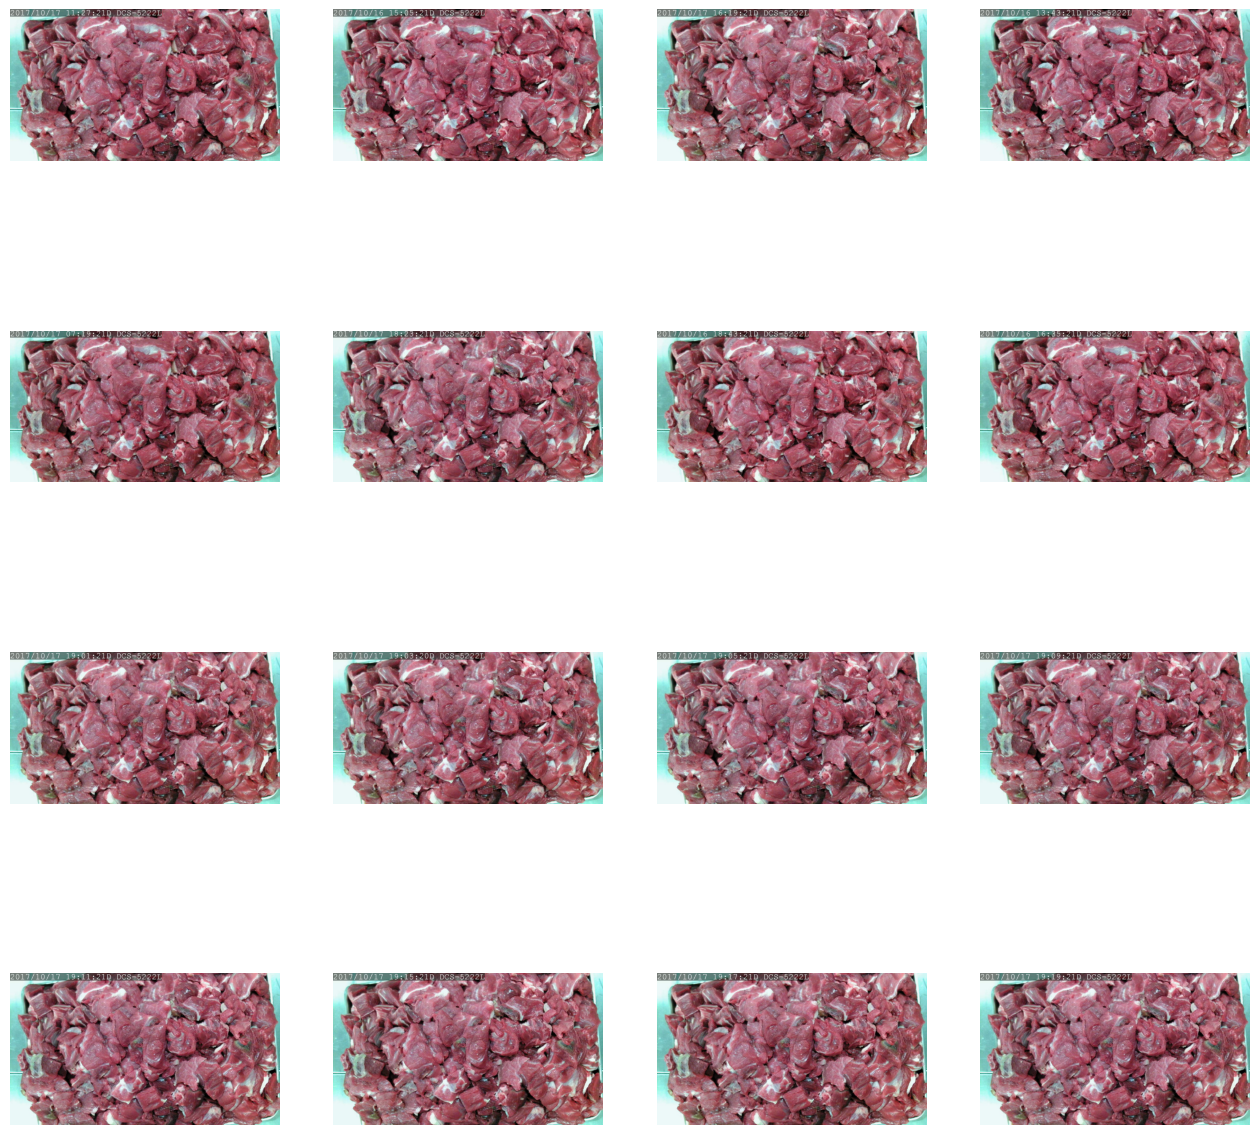

In [19]:
# Menampilkan sampel

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_meat_pix = [os.path.join(train_fresh, fname)
                for fname in train_fresh_fnames[pic_index-8:pic_index]]
next_meat_spoiled_pix = [os.path.join(train_spoiled, fname)
                for fname in train_spoiled_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_meat_pix+next_meat_spoiled_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# CNN

In [20]:
# DEEP LEARNING ARCHITECTURE

from tensorflow.keras import layers
from tensorflow.keras import Model

# Input berdimensi 150x150px dengan 3 channel untuk Blue, Green, dan Red
img_input = layers.Input(shape=(150, 150, 3))

# Convolution layer I: 16 filter berukuran 3x3
x = layers.Conv2D(16, 3, activation='relu')(img_input)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer II: 32 filter berukuran 3x3
x = layers.Conv2D(32, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Convolution layer III: 64 filter berukuran 3x3
x = layers.Conv2D(64, 3, activation='relu')(x)
# Pooling layer: Max-pooling layer 2x2
x = layers.MaxPooling2D(2)(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

# Menggabungkan layer input dan output
model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [22]:
# IMAGE DATA GENERATOR

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1516 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=47,  # 1516 images = batch_size * steps = 32*47
      epochs=15,
      validation_data=validation_generator,
      validation_steps=11,  # 382 images = batch_size * steps = 32*11
      verbose=2)

<ipython-input-23-4519621b9de3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
47/47 - 102s - loss: 0.4962 - acc: 0.8086 - val_loss: 0.1186 - val_acc: 0.9574 - 102s/epoch - 2s/step
Epoch 2/15
47/47 - 56s - loss: 0.1139 - acc: 0.9663 - val_loss: 0.0916 - val_acc: 0.9489 - 56s/epoch - 1s/step
Epoch 3/15
47/47 - 55s - loss: 0.0566 - acc: 0.9798 - val_loss: 0.1055 - val_acc: 0.9432 - 55s/epoch - 1s/step
Epoch 4/15
47/47 - 54s - loss: 0.0371 - acc: 0.9872 - val_loss: 0.0682 - val_acc: 0.9574 - 54s/epoch - 1s/step
Epoch 5/15
47/47 - 56s - loss: 0.0356 - acc: 0.9858 - val_loss: 0.0211 - val_acc: 0.9915 - 56s/epoch - 1s/step
Epoch 6/15
47/47 - 54s - loss: 0.0194 - acc: 0.9919 - val_loss: 0.0120 - val_acc: 1.0000 - 54s/epoch - 1s/step
Epoch 7/15
47/47 - 56s - loss: 0.0172 - acc: 0.9939 - val_loss: 0.0179 - val_acc: 0.9886 - 56s/epoch - 1s/step
Epoch 8/15
47/47 - 59s - loss: 0.0109 - acc: 0.9953 - val_loss: 0.0097 - val_acc: 0.9943 - 59s/epoch - 1s/step
Epoch 9/15
47/47 - 56s - loss: 0.0095 - acc: 0.9960 - val_loss: 0.0089 - val_acc: 0.9972 - 56s/epoch - 1s/step

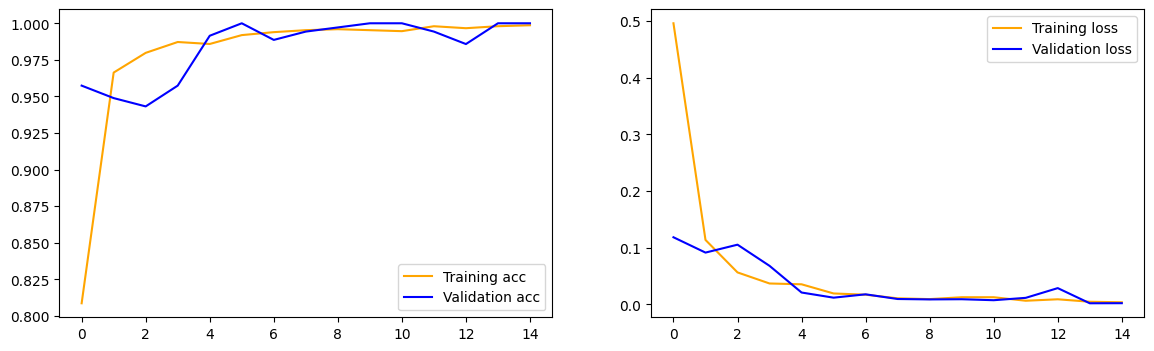

In [24]:
# VISUALISASI AKURASI PREDIKSI

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

f, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plotting accuracy
axes[0].plot(epochs, acc, 'orange', label='Training acc')
axes[0].plot(epochs, val_acc, 'blue', label='Validation acc')
axes[0].legend()

# Plotting loss
axes[1].plot(epochs, loss, 'orange', label='Training loss')
axes[1].plot(epochs, val_loss, 'blue', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [31]:
scores = model.evaluate(validation_generator)
print("Precision =", scores[1])
print("Loss =", scores[0])

12/12 [==============================] - 8s 668ms/step - loss: 0.0027 - acc: 1.0000
Precision = 1.0
Loss = 0.002671309746801853


/content/drive/MyDrive/Project PCD/Splitted/train/Spoiled/test_20171018_133321D.jpg
1/1 [==============================] - 0s 149ms/step


<ipython-input-35-a4bfdfc2321b>:36: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


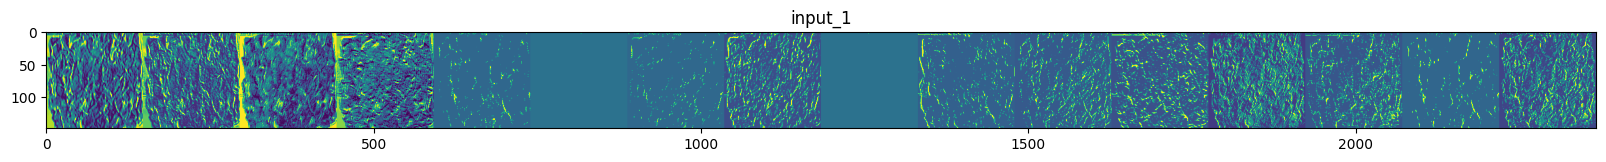

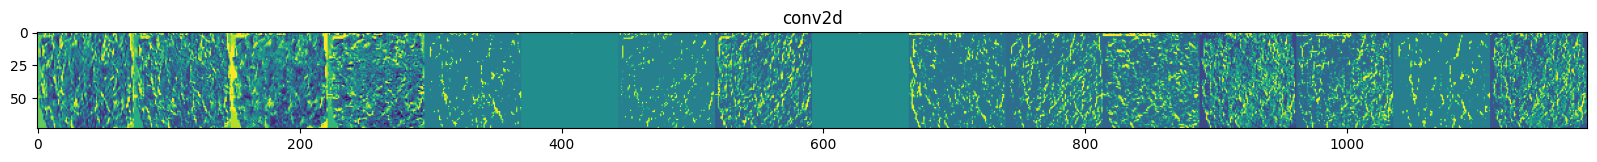

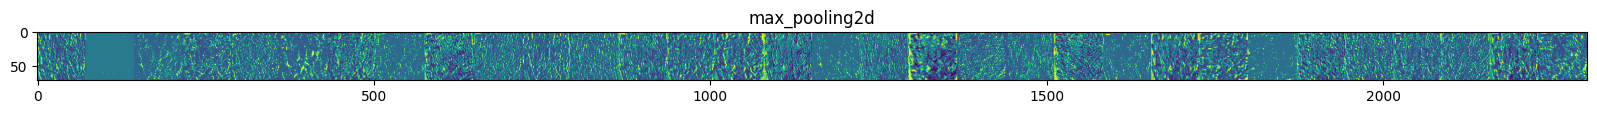

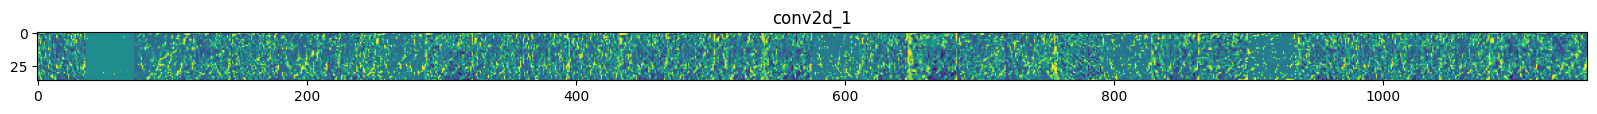

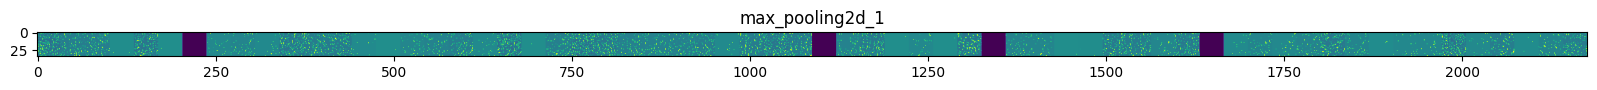

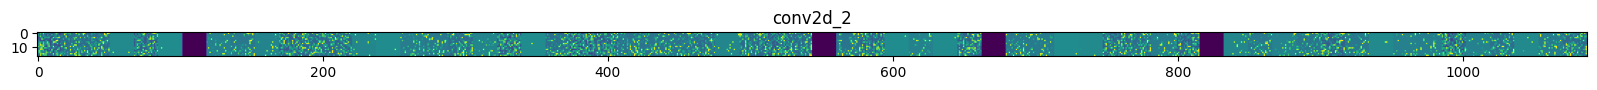

In [35]:
# DISPLAY FEATURE MAPS

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Mendefinisikan model untuk visualisasi
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Memilih 1 sampel random
fresh_img_files = [os.path.join(train_fresh, f) for f in train_fresh_fnames]
spoiled_img_files = [os.path.join(train_spoiled, f) for f in train_spoiled_fnames]
img_path = random.choice(spoiled_img_files)
print(img_path)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale 1/255
x /= 255

# Memasukkan image ke model
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Confusion Matrix

Found 382 images belonging to 2 classes.


<ipython-input-28-6ebc3956071c>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, len(test_generator), verbose=1)


382/382 [==============================] - 9s 22ms/step


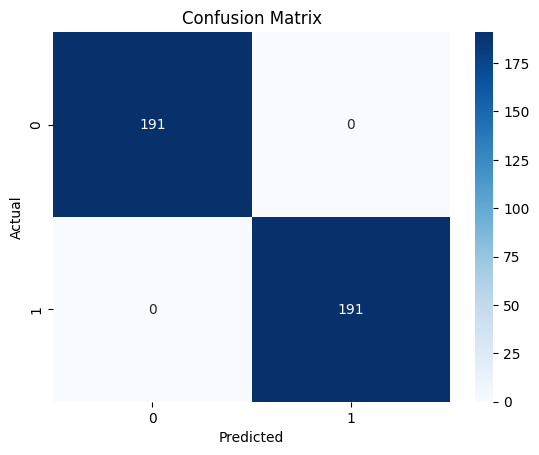

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi data uji
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

y_true = test_generator.classes
y_pred = model.predict_generator(test_generator, len(test_generator), verbose=1)
y_pred = y_pred > 0.5  # Menggunakan threshold 0.5 untuk mengubah nilai probabilitas menjadi kelas biner

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Testing

In [41]:
from keras.utils import load_img, img_to_array
import numpy as np

img_path='/content/drive/MyDrive/Project PCD/Splitted/test/Fresh/test_20171017_122521D.jpg' # fresh ->[[0.]]
#img_path='/content/drive/MyDrive/Project PCD/Splitted/test/Spoiled/test_20171019_030721D.jpg' # spoiled ->[[1.]]

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

preds=model.predict(x)
print(preds)

1/1 [==============================] - 0s 34ms/step
[[0.]]
